# 1. BOSTON

## 1-1. 데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 데이터셋 전처리 - 표준화
# 입력 데이터의 각 특성의 평균을 빼기
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눠주기
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듬
std = train_data.std(axis=0)
train_data = train_data/std

# 테스트 데이터셋도 동일 작업 반복 (데이터에서 평균 빼고, 표준편차로 나누기)
test_data = test_data - mean
test_data = test_data / std

## 1-2. 모델 구성 및 컴파일

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # 출력층, 회귀 문제이므로 활성화 함수 없음
])

# 모델 컴파일
model.compile(optimizer=Adam(),
              loss='mse',  # 평균 제곱 오차
              metrics=['mae'])  # 평균 절대 오차

## 1-3. 모델 학습

In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, epochs=30, validation_split=0.2, batch_size=32)

Epoch 1/30
11/11 [==============================] - 0s 7ms/step - loss: 13.4470 - mae: 2.5237 - val_loss: 16.2926 - val_mae: 3.1353
Epoch 2/30
11/11 [==============================] - 0s 4ms/step - loss: 13.1850 - mae: 2.5060 - val_loss: 16.4060 - val_mae: 3.1460
Epoch 3/30
11/11 [==============================] - 0s 4ms/step - loss: 12.9143 - mae: 2.4807 - val_loss: 16.1540 - val_mae: 3.1203
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 12.6751 - mae: 2.4619 - val_loss: 15.8512 - val_mae: 3.0883
Epoch 5/30
11/11 [==============================] - 0s 4ms/step - loss: 12.4433 - mae: 2.4373 - val_loss: 15.8227 - val_mae: 3.1037
Epoch 6/30
11/11 [==============================] - 0s 5ms/step - loss: 12.2678 - mae: 2.4159 - val_loss: 15.7456 - val_mae: 3.0878
Epoch 7/30
11/11 [==============================] - 0s 4ms/step - loss: 12.0847 - mae: 2.3933 - val_loss: 15.7515 - val_mae: 3.0873
Epoch 8/30
11/11 [==============================] - 0s 4ms/step - loss: 11.8

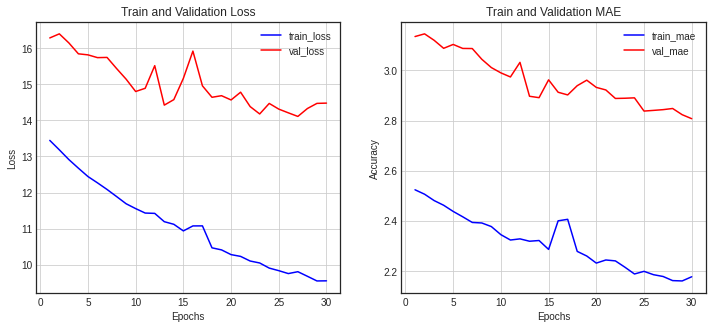

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 1-4. 모델 평가

In [8]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 25.5364 - mae: 3.3138


[25.53641128540039, 3.3138489723205566]

# ------------------------------------------------------------
# 2. REUTERS

## 2-1. 데이터 로드 및 전처리

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [10]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [11]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

## 2-2. 모델 구성 및 컴파일

In [12]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640064    
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 46)               

## 2-3. 학습

In [14]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = callbacks.ModelCheckpoint("reuters_model.h5", save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
14/14 [==============================] - 1s 44ms/step - loss: 3.8245 - accuracy: 0.1596 - val_loss: 3.6481 - val_accuracy: 0.4955
Epoch 2/50
14/14 [==============================] - 0s 16ms/step - loss: 2.6303 - accuracy: 0.4495 - val_loss: 3.3591 - val_accuracy: 0.5944
Epoch 3/50
14/14 [==============================] - 0s 15ms/step - loss: 2.0456 - accuracy: 0.5836 - val_loss: 3.0535 - val_accuracy: 0.6745
Epoch 4/50
14/14 [==============================] - 0s 15ms/step - loss: 1.6855 - accuracy: 0.6566 - val_loss: 2.7801 - val_accuracy: 0.7017
Epoch 5/50
14/14 [==============================] - 0s 16ms/step - loss: 1.4447 - accuracy: 0.7018 - val_loss: 2.5473 - val_accuracy: 0.7182
Epoch 6/50
14/14 [==============================] - 0s 16ms/step - loss: 1.2881 - accuracy: 0.7307 - val_loss: 2.3505 - val_accuracy: 0.7337
Epoch 7/50
14/14 [==============================] - 0s 16ms/step - loss: 1.1570 - accuracy: 0.7506 - val_loss: 2.1848 - val_accuracy: 0.7391
Epoch 8/50
14

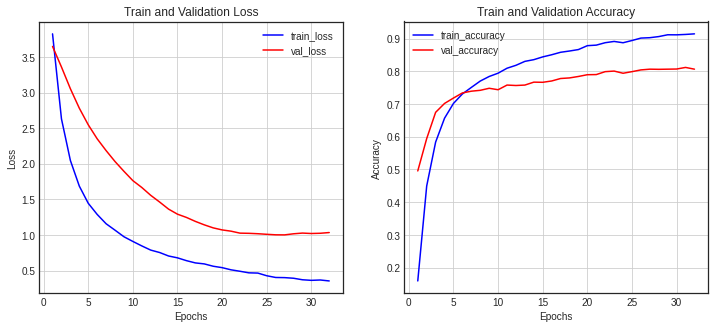

In [16]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 2-4. 평가

In [17]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\n테스트 정확도: {test_acc:.4f}')

71/71 [==============================] - 0s 3ms/step - loss: 1.0725 - accuracy: 0.7832

테스트 정확도: 0.7832


# --------------------------------------------------------
# 3. CIFAR 10

## 3-1. 데이터 로드 및 전처리

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [19]:
# 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

In [20]:
# 훈련 데이터셋의 20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = 0.2, random_state=42)

In [21]:
# 훈련, 검증, 테스트 데이터와 레이블 종류 개수 확인
print('전체 학습 데이터: {} 레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('학습 데이터: {} 레이블: {}'.format(x_train.shape, y_train.shape))
print('검증 데이터: {} 레이블: {}'.format(x_val.shape, y_val.shape))
print('테스트 데이터: {} 레이블: {}'.format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [22]:
# cifar10의 분류 레이블에 해당하는 10개 값을 class_name 변수에 저장
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

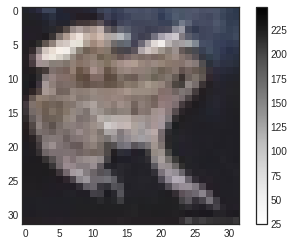

In [23]:
# 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태 확인
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [24]:
# 훈련, 검증, 테스트 데이터의 형태 출력
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [25]:
# 딥러닝 학습을 위해 데이터 형태 변경 : 32*32*3=3072
x_train = x_train.reshape((x_train.shape[0], 32*32*3))
x_val = x_val.reshape((x_val.shape[0], 32*32*3))
x_test = x_test.reshape((x_test.shape[0], 32*32*3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [26]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 3-2. 모델 구성 및 컴파일

In [27]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(32 * 32 * 3,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

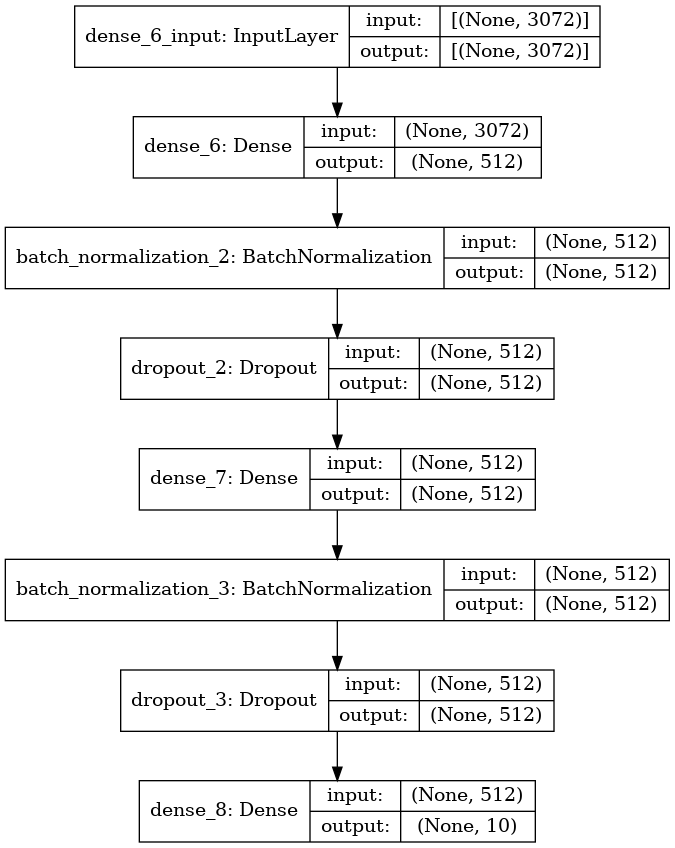

In [29]:
utils.plot_model(model, show_shapes=True)

## 3-3. 모델 학습

In [30]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = callbacks.ModelCheckpoint("cifar10_model.h5", save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
625/625 [==============================] - 3s 4ms/step - loss: 2.2126 - accuracy: 0.2835 - val_loss: 1.8724 - val_accuracy: 0.3283
Epoch 2/50
625/625 [==============================] - 2s 3ms/step - loss: 1.8444 - accuracy: 0.3469 - val_loss: 1.8406 - val_accuracy: 0.3540
Epoch 3/50
625/625 [==============================] - 2s 3ms/step - loss: 1.8043 - accuracy: 0.3524 - val_loss: 1.7621 - val_accuracy: 0.3577
Epoch 4/50
625/625 [==============================] - 2s 3ms/step - loss: 1.7775 - accuracy: 0.3681 - val_loss: 1.6813 - val_accuracy: 0.3897
Epoch 5/50
625/625 [==============================] - 2s 3ms/step - loss: 1.7487 - accuracy: 0.3719 - val_loss: 1.7239 - val_accuracy: 0.3572
Epoch 6/50
625/625 [==============================] - 2s 3ms/step - loss: 1.7557 - accuracy: 0.3724 - val_loss: 1.6414 - val_accuracy: 0.4034
Epoch 7/50
625/625 [==============================] - 2s 3ms/step - loss: 1.7460 - accuracy: 0.3740 - val_loss: 1.6214 - val_accuracy: 0.4208
Epoch 

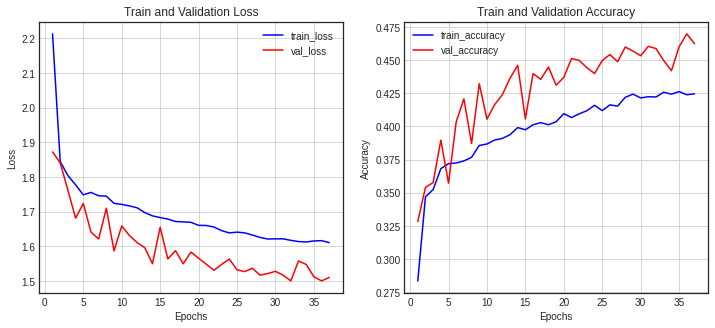

In [31]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 3-4. 모델 평가 및 예측

In [32]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4914 - accuracy: 0.4719


[1.4913691282272339, 0.47189998626708984]